# Red Wine Sample Quality Prediction

In this notebook, we try to create Machine Learning Classifier which can classify Red Wine into different categories based on its quality of taste.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr

### About Dataset

##### We will be using three different classifier algorithms and then identify which of the three performs best. The algorithms used will be KNN, Decision Trees and Support Vector Machines.

## Load the Dataset from CSV File

In [2]:
df = pd.read_csv('E:/Ritik/Study/Machine Learning/Unschool/Project 3 - Classification/winequality-red.csv',names=[0])
df.head()

,0
0,"fixed acidity;""volatile acidity"";""citric acid""..."
1,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
2,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
3,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
4,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...


As the dataset is not properly written, we need to parse it.

In [3]:
s = df.shape
s

(1600, 1)

In [4]:
data=[]
for i in range(s[0]):
    l = df.iloc[i,0].split(';')
    data.append([l[x].strip('"') if (not i) else float(l[x]) for x in range(12)])
df = pd.DataFrame(data,columns=data.pop(0))

In [5]:
del data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [6]:
df.shape

(1599, 12)

## Data Visualization and Pre-processing

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


There are no missing values in the dataset, and we can see the mean, standard deviation and inter-quartile ranges of different features of the dataset.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

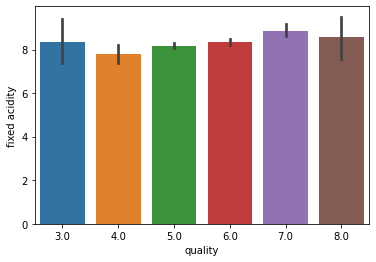

In [8]:
# fixed acidity of red wine accounts for the concentration of acids
# like citric acid and other acids, which remain in the red wine.
sns.barplot(x='quality',y='fixed acidity',data=df)

###### Inference:
We can see that fixed acidity of red wine does not affect the quality of the red wine, as same level of fixed acidity concentration are seen for all qualities of wine.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

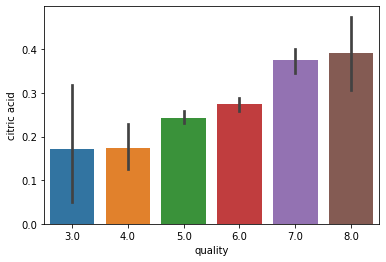

In [9]:
# citric acid shows the effect of citric acid on quality individually.
sns.barplot(x='quality',y='citric acid',data=df)

###### Inference:
We can see that quality of red wine is more with increasing citric acid.

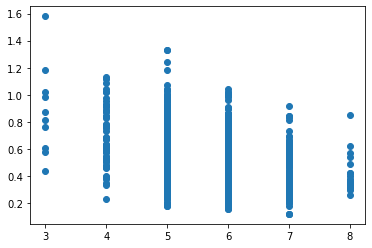

In [10]:
# volatile acidity mostly accounts for the presence of acetic acid in wine.
plt.scatter(x=df['quality'],y=df['volatile acidity'])

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

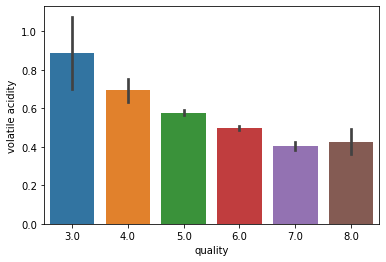

In [11]:
sns.barplot(x=df['quality'],y=df['volatile acidity'])

###### Inference:
Volatile acidity has an effect on the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

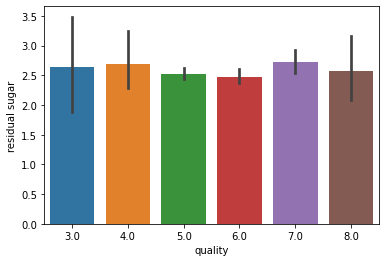

In [12]:
# Residual sugar gives taste of sweetness in wine, more the residual sugar sweeter is the wine.
sns.barplot(x='quality',y='residual sugar',data=df)

###### Inference:
We can see that residual sugar does not have much of an effect over the quality of student.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

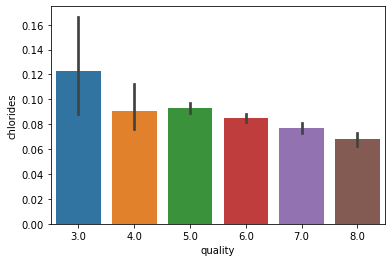

In [13]:
# Chlorides is the amount of chloride present in wine in combined form or salts.
sns.barplot(x='quality',y='chlorides',data=df)

###### Inference:
Chlorides has an effect on the quality of wine, as chlorides increases quality decreases.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

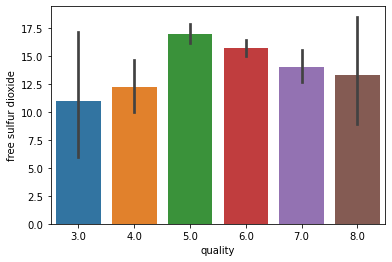

In [14]:
# free sulfur dioxide is the SO2 present in wine in free form.
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

###### Inference:
Free sulfur dioxide has some effect on the quality.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

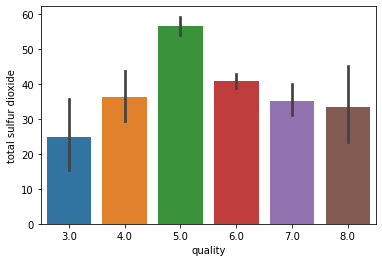

In [15]:
# total sulfur dioxie is the free sulfru dioxide plus the sulfur in the combined form with other compounds.
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

###### Inference:
Even total sulfur dioxide has an effect over the quality.

<AxesSubplot:xlabel='quality', ylabel='density'>

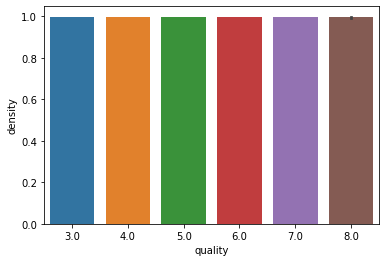

In [16]:
# density is the density of wine.
sns.barplot(x='quality',y='density',data=df)

###### Inference:
Density of wine is same for all composition of wines, so it does not give much of an insight.

<AxesSubplot:xlabel='quality', ylabel='pH'>

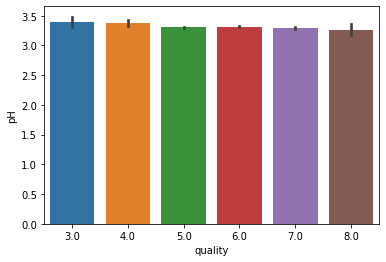

In [17]:
# pH of wine
sns.barplot(x='quality',y='pH',data=df)

###### Inference:
pH of wine does not show much variation, however after research in the field, in real life pH is important factor in determination of wine quality.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

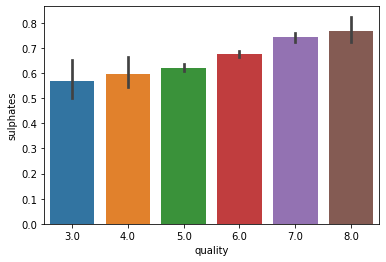

In [18]:
# sulphur present in salt form of sulphates in wine.
sns.barplot(x='quality',y='sulphates',data=df)

###### Inference:
Increase in sulphates gives better quality wine.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

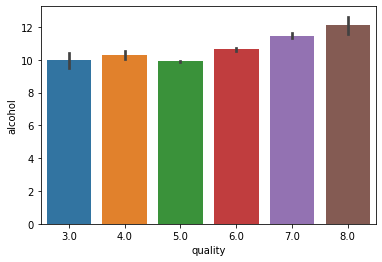

In [19]:
# The amount of alcohol dissolved in wine.
sns.barplot(x='quality',y='alcohol',data=df)

###### Inference:
Alcohol is an important factor in wine quality determinaion.

<AxesSubplot:xlabel='quality', ylabel='count'>

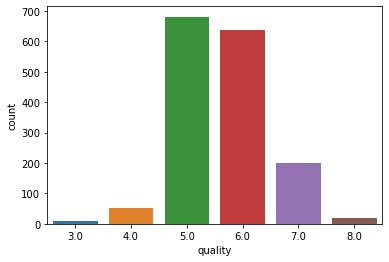

In [20]:
sns.countplot(x='quality',data=df)

We can see most of red wines are scored in 5 and 6.

### Conclusions and Feature Selection:

##### Since some feature do not show much variation in wuality of wine with the change in respective features, we drop them and do not take them in training the model. The feature which will be dropped are:

##### 1. Fixed acidity
##### 2. Residual Sugar
##### 3. density

In [21]:
Feature = df[['citric acid','volatile acidity','chlorides','free sulfur dioxide',
              'total sulfur dioxide','pH','sulphates','alcohol']]
Feature.head()

,citric acid,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.00,0.70,0.076,11.0,34.0,3.51,0.56,9.4
1,0.00,0.88,0.098,25.0,67.0,3.20,0.68,9.8
2,0.04,0.76,0.092,15.0,54.0,3.26,0.65,9.8
3,0.56,0.28,0.075,17.0,60.0,3.16,0.58,9.8
4,0.00,0.70,0.076,11.0,34.0,3.51,0.56,9.4


In [22]:
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[-1.39147228,  0.96187667, -0.24370669, -0.46619252, -0.37913269,
         1.28864292, -0.57920652, -0.96024611],
       [-1.39147228,  1.96744245,  0.2238752 ,  0.87263823,  0.62436323,
        -0.7199333 ,  0.1289504 , -0.58477711],
       [-1.18607043,  1.29706527,  0.09635286, -0.08366945,  0.22904665,
        -0.33117661, -0.04808883, -0.58477711],
       [ 1.4841536 , -1.38444349, -0.26496041,  0.10759209,  0.41150046,
        -0.97910442, -0.46118037, -0.58477711],
       [-1.39147228,  0.96187667, -0.24370669, -0.46619252, -0.37913269,
         1.28864292, -0.57920652, -0.96024611]])

In [23]:
y = df['quality']
bins=(2,4,6,8)
groups=['bad','medium','good']
y = pd.cut(y,bins=bins,labels=groups)
y

0       medium
1       medium
2       medium
3       medium
4       medium
         ...  
1594    medium
1595    medium
1596    medium
1597    medium
1598    medium
Name: quality, Length: 1599, dtype: category
Categories (3, object): [bad < medium < good]

# Train-Test Split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [25]:
print('Train Set: ',X_train.shape,y_train.shape)
print('Test Set: ',X_test.shape,y_test.shape)

Train Set:  (1199, 8) (1199,)
Test Set:  (400, 8) (400,)


# Classification

We will use different models for making a classifier and see which classifying algorithm gives the best result

## 1. KNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
k=5
neigh = KNeighborsClassifier(n_neighbors=k)

neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Train Accuracy

In [27]:
jaccard_similarity_score(y_train,neigh.predict(X_train))

C:\Users\laptech computer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8657214345287739

### Determining best k:

In [28]:
param_range = np.array(range(1,15))
train_scores, test_scores = validation_curve(KNeighborsClassifier(),X_train,y_train,'n_neighbors'
                                             ,param_range,scoring='jaccard_micro',cv=4)

print(train_scores)
print(test_scores)

[[1.         1.         1.         1.        ]
 [0.81616162 0.81432896 0.80885312 0.83299389]
 [0.798      0.80885312 0.81616162 0.80541625]
 [0.75757576 0.78019802 0.77142857 0.76470588]
 [0.77492596 0.76447498 0.76620825 0.75609756]
 [0.74902724 0.73887814 0.7592955  0.76297747]
 [0.75243665 0.74056147 0.74224806 0.7526777 ]
 [0.74563107 0.72552783 0.74056147 0.74081238]
 [0.75243665 0.74563107 0.74393792 0.74927114]
 [0.74563107 0.74902724 0.73217726 0.74418605]
 [0.74563107 0.7473275  0.73384764 0.74249758]
 [0.73552124 0.74563107 0.72222222 0.74081238]
 [0.74224806 0.74393792 0.72552783 0.73745174]
 [0.74224806 0.73887814 0.72222222 0.73076923]]
[[0.66204986 0.65289256 0.70454545 0.625     ]
 [0.58730159 0.55844156 0.61725067 0.59466667]
 [0.66204986 0.67130919 0.68067227 0.66573816]
 [0.62601626 0.66204986 0.65745856 0.6519337 ]
 [0.66204986 0.68067227 0.69014085 0.70857143]
 [0.64383562 0.65745856 0.68067227 0.7183908 ]
 [0.66666667 0.68067227 0.69491525 0.73333333]
 [0.66666667

Max Train Mean= 1.0 Max Test Mean= 0.706875280521432


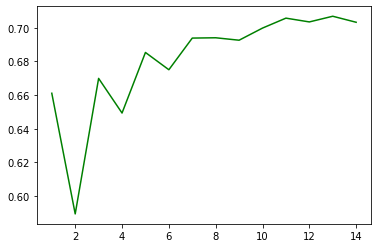

In [29]:
train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

print('Max Train Mean=',max(train_mean),'Max Test Mean=',max(test_mean))
plt.plot(param_range,test_mean,'g')

In [30]:
np.where(test_mean==max(test_mean))

(array([12], dtype=int64),)

In [31]:
param_range[12]

13

###### We found the best n_neighbors parameter for KNN model. Therefore, we train the KNN Model with k=13.

In [32]:
k=13
neigh = KNeighborsClassifier(n_neighbors=k)

neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

### Train Accuracy

In [33]:
jaccard_similarity_score(y_train,neigh.predict(X_train))

C:\Users\laptech computer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.854045037531276

## 2. Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
Tree = DecisionTreeClassifier(criterion='entropy')

In [36]:
Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Train Accuracy

In [37]:
jaccard_similarity_score(y_train,Tree.predict(X_train))

C:\Users\laptech computer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


1.0

#### Model Accuracy is 1.0 because Decisiont Tree usually overfits the training model. We shall see the actual usefulness of this model when we check it test set.

## 3. Support Vector Machine

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC(gamma='auto')

In [40]:
param = { 'C':[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5],
        'kernel': ['linear','rbf','poly']
        }
grid_SVC = GridSearchCV(svc,param_grid=param,scoring='jaccard_micro',cv=4)
grid_SVC.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
                               1.5],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='jaccard_micro', verbose=0)

In [41]:
grid_SVC.best_params_

{'C': 1.1, 'kernel': 'rbf'}

###### We find the best parameters as given above. So, now we train the SVM model with the above parameters.

In [42]:
svc = SVC(C=1.1,kernel='rbf',gamma='auto')
svc.fit(X_train,y_train)

SVC(C=1.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Train Accuracy

In [43]:
jaccard_similarity_score(y_train,svc.predict(X_train))

C:\Users\laptech computer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8515429524603837

# Model Evaluation with Test Set

## 1. KNN Evaluation

In [44]:
y_hat_KNN = neigh.predict(X_test)
jaccard_similarity_score(y_test,y_hat_KNN)

C:\Users\laptech computer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.84

### The Model accuracy is 84%.

## 2. Decision Tree Evaluation

In [45]:
y_hat_tree = Tree.predict(X_test)

jaccard_similarity_score(y_test,y_hat_tree)

C:\Users\laptech computer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.83

### The Decision Tree Model accuracy is 83%.

## 3. SVM Models Evaluation 

In [46]:
y_hat_svc = svc.predict(X_test)
jaccard_similarity_score(y_test, y_hat_svc)

C:\Users\laptech computer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8725

### The Support Vector Classifier Model accuracy is 87.25%.